<h1>Heart Disease Binary Classification</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,make_scorer

<h2>Inspecting the Data for Missing Values</h2>

For this project we are required to train a model on one dataset and test the dataset on 2 or more datasets to ensure that the model is a good fit and was not over/underfitted in training.

Therefore since multiple datasets were used we will focus only on the features common to all three datasets and remove the rest.

The common features found in all three datasets were:
1. age
2. sex
3. chestpain type
4. blood pressure
5. cholesterol
6. fbs
7. restecg
8. max heart rate
9. exang
10. ST depression(old peak)
11. slope
12. Num Vessels
13. thal
14. heart_disease

The initial model will be trained on the UCI Heart Disease Dataset.

In [2]:
df = pd.read_csv("Datasets\heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.drop(df[['id','dataset']],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


We see that most of the columns contain missing values so we will have to do data imputation and we may have to drop some columns.

In [7]:
print(f"Percentage of missing values in each column is:\n {(df.isna().sum()/len(df) *100).sort_values(ascending=False)}")

Percentage of missing values in each column is:
 ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
age          0.000000
sex          0.000000
cp           0.000000
num          0.000000
dtype: float64


In [86]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [8]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [9]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [10]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [11]:
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [12]:
imputed_df = df.copy()
imputed_df['trestbps'] = num_imputer.fit_transform(imputed_df)

In [13]:
imputed_df['trestbps'].isna().sum()

0

In [14]:
for col in missing_data_cols:
    if col in categorical_cols:
        imputed_df[col] = cat_imputer.fit_transform(imputed_df[[col]])
    elif col in numeric_cols:
        imputed_df[col] = num_imputer.fit_transform(imputed_df[[col]])
    else:
        pass

In [15]:
imputed_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,63.0,233.0,1,0,150.0,0,2.3,0,0,0,0
1,67,1,0,67.0,286.0,0,0,108.0,1,1.5,1,3,1,2
2,67,1,0,67.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,37,1,2,37.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,41,0,1,41.0,204.0,0,0,172.0,0,1.4,2,0,1,0


In [16]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int32  
 2   cp        920 non-null    int32  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int32  
 6   restecg   920 non-null    int32  
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int32  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int32  
 11  ca        920 non-null    int64  
 12  thal      920 non-null    int32  
 13  num       920 non-null    int64  
dtypes: float64(4), int32(7), int64(3)
memory usage: 75.6 KB


<h1>Handling Outliers</h1>

Since outliers are usually wrt continuous data we will only examine our numeric columns

In [17]:
imputed_df[numeric_cols].describe()

,oldpeak,thalch,chol,trestbps,age
count,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.878788,137.545665,199.130337,53.510870,53.510870
std,1.053774,25.138494,108.957634,9.424685,9.424685
min,-2.600000,60.000000,0.000000,28.000000,28.000000
25%,0.000000,120.000000,177.750000,47.000000,47.000000
50%,0.800000,138.000000,221.000000,54.000000,54.000000
75%,1.500000,156.000000,267.000000,60.000000,60.000000
max,6.200000,202.000000,603.000000,77.000000,77.000000


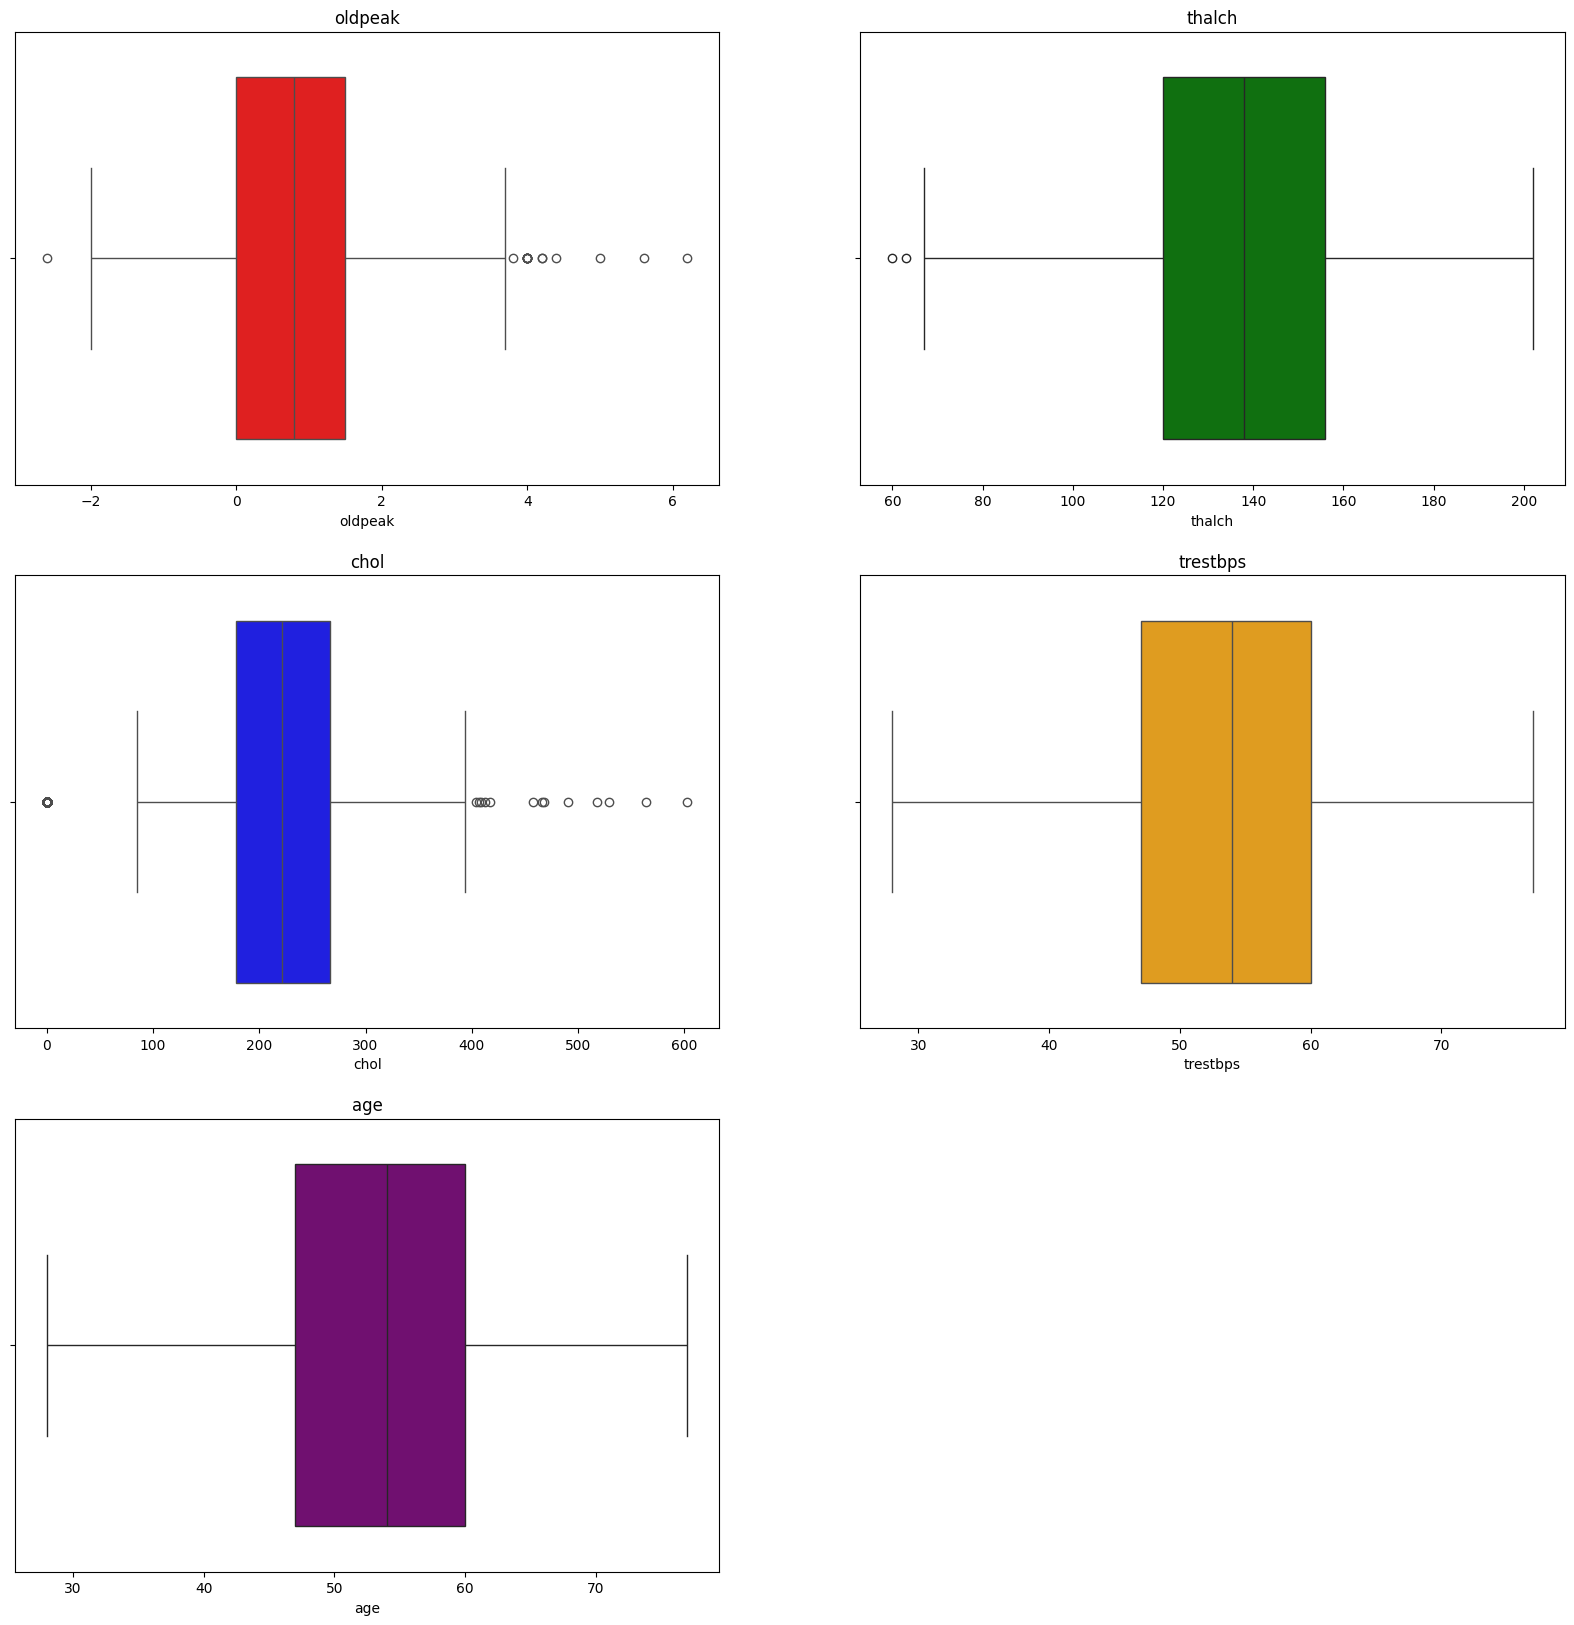

In [18]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=imputed_df[col], color=colors[i])
    plt.title(col)
plt.show()

<h1>Machine Learning Algorithms</h1>


Scaling Data

In [19]:
scaler = StandardScaler()

imputed_df[numeric_cols] = scaler.fit_transform(imputed_df[numeric_cols])

In [20]:
scaler = StandardScaler()

imputed_df[numeric_cols] = scaler.fit_transform(imputed_df[numeric_cols])

In [21]:
X = imputed_df.drop('num', axis=1)
y = imputed_df['num']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [22]:
X = imputed_df.drop('num', axis=1)
y = imputed_df['num']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

<h2>Support Vector Machine</h2>

In [23]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

# predict the test data
y_pred = svm_model.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.5380434782608695
Precision score:  0.5380434782608695
Recall score:  0.5380434782608695
F1 score:  0.5380434782608695


<h2>Logistic Regression</h2>

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# predict the test data
y_pred = lr.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.5380434782608695
Precision score:  0.5380434782608695
Recall score:  0.5380434782608695
F1 score:  0.5380434782608695


In [25]:
log_reg = LogisticRegression(max_iter=1000)  # Set max_iter for convergence

# Perform cross-validation
scores = cross_val_score(log_reg, X, y, cv=10)  # k-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.4673913  0.52173913 0.5326087  0.57608696 0.67391304 0.67391304
 0.54347826 0.51086957 0.39130435 0.34782609]
Mean CV Score: 0.5239130434782608


<h2>K Nearest Neighbours</h2>

In [26]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)

    # predict the test data
    y_pred = knn.predict(X_test)

    print(f'Accuracy score at k = {i}: ', accuracy_score(y_test, y_pred))

Accuracy score at k = 1:  0.5
Accuracy score at k = 2:  0.5054347826086957
Accuracy score at k = 3:  0.5108695652173914
Accuracy score at k = 4:  0.5597826086956522
Accuracy score at k = 5:  0.532608695652174
Accuracy score at k = 6:  0.5163043478260869
Accuracy score at k = 7:  0.5271739130434783
Accuracy score at k = 8:  0.5597826086956522
Accuracy score at k = 9:  0.5217391304347826


In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(X_train, y_train)

# predict the test data
y_pred = knn.predict(X_test)

#scores = cross_val_score(kf, X, y, cv=kf)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.5597826086956522
Precision score:  0.5597826086956522
Recall score:  0.5597826086956522
F1 score:  0.5597826086956522


<h2>Decision Tree</h2>

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.5597826086956522
Precision score:  0.5597826086956522
Recall score:  0.5597826086956522
F1 score:  0.5597826086956522


<h1>Testing Models on Alternative Datasets</h1>

In [99]:
df3 = pd.read_csv("Datasets\heart.csv")
df2 = pd.read_csv("Datasets\Heart_Disease_Prediction.csv")


In [100]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [101]:
df2.columns
df2 = df2.rename(columns={'Age':'age', 'Sex':'sex', 'Chest pain type':'cp', 'BP':'trestbps', 'Cholesterol':'chol', 'FBS over 120':'fbs',
       'EKG results':'restecg', 'Max HR':'thalch', 'Exercise angina':'exang', 'ST depression':'oldpeak',
       'Slope of ST':'slope', 'Number of vessels fluro':'ca', 'Thallium':'thal', 'Heart Disease':'num'})

In [102]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [103]:
df2['num'].value_counts()

num
Absence     150
Presence    120
Name: count, dtype: int64

In [105]:
df2['num'].value_counts()

num
Absence     150
Presence    120
Name: count, dtype: int64

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalch    270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  num       270 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 29.7+ KB


In [107]:
df2['num'] = le.fit_transform(df2['num'] )

In [108]:
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [109]:
df3 = df3.rename(columns={'thalach':'thalch','target':'num'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalch    1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  num       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [110]:
df3.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [111]:
scaled_df2 = df2.copy()

scaled_df2[numeric_cols] = scaler.fit_transform(scaled_df2[numeric_cols])

In [112]:
scaled_df3 = df3.copy()

scaled_df3[numeric_cols] = scaler.fit_transform(scaled_df3[numeric_cols])

In [113]:
X2 = scaled_df2.drop('num', axis=1)
y2 = scaled_df2['num']

X3 = scaled_df3.drop('num', axis=1)
y3 = scaled_df3['num']

# split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

<h2>Logistic Regression</h2>

In [114]:
y_pred = lr.predict(X2)

print('Accuracy score: ', accuracy_score(y2, y_pred))
print('Precision score: ', precision_score(y2, y_pred, average='micro'))
print('Recall score: ', recall_score(y2, y_pred, average='micro'))
print('F1 score: ', f1_score(y2, y_pred, average='micro'))

Accuracy score:  0.5518518518518518
Precision score:  0.5518518518518518
Recall score:  0.5518518518518518
F1 score:  0.5518518518518518


In [115]:
y_pred = lr.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.24097560975609755
Precision score:  0.24097560975609755
Recall score:  0.24097560975609755
F1 score:  0.24097560975609755


<h2>SVM</h2>

In [116]:
y_pred = svm_model.predict(X2)

print('Accuracy score: ', accuracy_score(y2, y_pred))
print('Precision score: ', precision_score(y2, y_pred, average='micro'))
print('Recall score: ', recall_score(y2, y_pred, average='micro'))
print('F1 score: ', f1_score(y2, y_pred, average='micro'))

Accuracy score:  0.5703703703703704
Precision score:  0.5703703703703704
Recall score:  0.5703703703703704
F1 score:  0.5703703703703704


In [117]:
y_pred = svm_model.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.19219512195121952
Precision score:  0.19219512195121952
Recall score:  0.19219512195121952
F1 score:  0.19219512195121952


<h2>KNN</h2>

In [118]:
y_pred = knn.predict(X2)

print('Accuracy score: ', accuracy_score(y2, y_pred))
print('Precision score: ', precision_score(y2, y_pred, average='micro'))
print('Recall score: ', recall_score(y2, y_pred, average='micro'))
print('F1 score: ', f1_score(y2, y_pred, average='micro'))

Accuracy score:  0.5592592592592592
Precision score:  0.5592592592592592
Recall score:  0.5592592592592592
F1 score:  0.5592592592592592


In [119]:
y_pred = knn.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.16682926829268294
Precision score:  0.16682926829268294
Recall score:  0.16682926829268294
F1 score:  0.16682926829268294


<h2>Decision Tree</h2>

In [120]:
y_pred = dt.predict(X2)

print('Accuracy score: ', accuracy_score(y2, y_pred))
print('Precision score: ', precision_score(y2, y_pred, average='micro'))
print('Recall score: ', recall_score(y2, y_pred, average='micro'))
print('F1 score: ', f1_score(y2, y_pred, average='micro'))

Accuracy score:  0.5148148148148148
Precision score:  0.5148148148148148
Recall score:  0.5148148148148148
F1 score:  0.5148148148148148


In [121]:
y_pred = dt.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.19902439024390245
Precision score:  0.19902439024390245
Recall score:  0.19902439024390245
F1 score:  0.19902439024390245


<h1>Models Trained on Second Dataset</h1>

<h2>Logistic Regression</h2>

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2 , random_state=42)

In [123]:
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X_train, y_train)
# predict the test data
y_pred = lr2.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.9074074074074074
Precision score:  0.9074074074074074
Recall score:  0.9074074074074074
F1 score:  0.9074074074074074


In [124]:
y_pred = lr2.predict(X)

print('Accuracy score: ', accuracy_score(y, y_pred))
print('Precision score: ', precision_score(y, y_pred, average='micro'))
print('Recall score: ', recall_score(y, y_pred, average='micro'))
print('F1 score: ', f1_score(y, y_pred, average='micro'))

Accuracy score:  0.40543478260869564
Precision score:  0.40543478260869564
Recall score:  0.40543478260869564
F1 score:  0.40543478260869564


In [125]:
y_pred = lr2.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.4634146341463415
Precision score:  0.4634146341463415
Recall score:  0.4634146341463415
F1 score:  0.4634146341463415


<h2>SVM</h2>

In [126]:
svm_model2 = SVC()
svm_model2.fit(X_train, y_train)

# predict the test data
y_pred = svm_model.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.5925925925925926
Precision score:  0.5925925925925926
Recall score:  0.5925925925925926
F1 score:  0.5925925925925926


In [127]:
y_pred = svm_model2.predict(X)

print('Accuracy score: ', accuracy_score(y, y_pred))
print('Precision score: ', precision_score(y, y_pred, average='micro'))
print('Recall score: ', recall_score(y, y_pred, average='micro'))
print('F1 score: ', f1_score(y, y_pred, average='micro'))

Accuracy score:  0.45217391304347826
Precision score:  0.45217391304347826
Recall score:  0.45217391304347826
F1 score:  0.45217391304347826


In [128]:
y_pred = svm_model2.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.48097560975609754
Precision score:  0.48097560975609754
Recall score:  0.48097560975609754
F1 score:  0.48097560975609754


<h2>KNN</h2>

In [129]:
for i in range(1,10):
    knn2 = KNeighborsClassifier(n_neighbors= i)
    knn2.fit(X_train, y_train)

    # predict the test data
    y_pred = knn2.predict(X_test)

    print(f'Accuracy score at k = {i}: ', accuracy_score(y_test, y_pred))

Accuracy score at k = 1:  0.7037037037037037
Accuracy score at k = 2:  0.7222222222222222
Accuracy score at k = 3:  0.7777777777777778
Accuracy score at k = 4:  0.7962962962962963
Accuracy score at k = 5:  0.8148148148148148
Accuracy score at k = 6:  0.8148148148148148
Accuracy score at k = 7:  0.8333333333333334
Accuracy score at k = 8:  0.8518518518518519
Accuracy score at k = 9:  0.8148148148148148


In [130]:
knn2 = KNeighborsClassifier(n_neighbors= 8)
knn2.fit(X_train, y_train)

# predict the test data
y_pred = knn2.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.8518518518518519
Precision score:  0.8518518518518519
Recall score:  0.8518518518518519
F1 score:  0.8518518518518519


In [131]:
y_pred = knn2.predict(X)

print('Accuracy score: ', accuracy_score(y, y_pred))
print('Precision score: ', precision_score(y, y_pred, average='micro'))
print('Recall score: ', recall_score(y, y_pred, average='micro'))
print('F1 score: ', f1_score(y, y_pred, average='micro'))

Accuracy score:  0.44565217391304346
Precision score:  0.44565217391304346
Recall score:  0.44565217391304346
F1 score:  0.44565217391304346


In [132]:
y_pred = knn2.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.48292682926829267
Precision score:  0.48292682926829267
Recall score:  0.48292682926829267
F1 score:  0.48292682926829267


<h2>Decision Tree</h2>

In [133]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train,y_train)

# predict the test data
y_pred = dt2.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.6851851851851852
Precision score:  0.6851851851851852
Recall score:  0.6851851851851852
F1 score:  0.6851851851851852


In [134]:
y_pred = dt2.predict(X)

print('Accuracy score: ', accuracy_score(y, y_pred))
print('Precision score: ', precision_score(y, y_pred, average='micro'))
print('Recall score: ', recall_score(y, y_pred, average='micro'))
print('F1 score: ', f1_score(y, y_pred, average='micro'))

Accuracy score:  0.44782608695652176
Precision score:  0.44782608695652176
Recall score:  0.44782608695652176
F1 score:  0.44782608695652176


In [135]:
y_pred = dt2.predict(X3)

print('Accuracy score: ', accuracy_score(y3, y_pred))
print('Precision score: ', precision_score(y3, y_pred, average='micro'))
print('Recall score: ', recall_score(y3, y_pred, average='micro'))
print('F1 score: ', f1_score(y3, y_pred, average='micro'))

Accuracy score:  0.3229268292682927
Precision score:  0.3229268292682927
Recall score:  0.3229268292682927
F1 score:  0.3229268292682927


<h1>Cross Validation</h1>

In [136]:
clf = DecisionTreeClassifier()

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5


In [142]:
clf = DecisionTreeClassifier()

scoring = {'accuracy', 'precision','recall', 'f1_score'}

sk_folds = StratifiedKFold(n_splits = 10)

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='precision')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='f1')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5
Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5


In [138]:
clf = KNeighborsClassifier(n_neighbors= 8)

scoring = {'accuracy', 'precision','recall', 'f1_score'}

sk_folds = StratifiedKFold(n_splits = 10)

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='precision')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='f1')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5
Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5


In [139]:
clf = SVC()

scoring = {'accuracy', 'precision','recall', 'f1_score'}

sk_folds = StratifiedKFold(n_splits = 10) 

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='precision')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='f1')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5
Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5


In [140]:
clf = LogisticRegression()
scoring = {'accuracy', 'precision','recall', 'f1_score'}

sk_folds = StratifiedKFold(n_splits = 5)

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='precision')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

results = cross_val_score(clf,X2,y2,cv=sk_folds,scoring='f1')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5
Cross Validation Scores:  [0.43478261 0.39673913 0.45652174 0.16304348 0.27173913]
Average CV Score:  0.3445652173913044
Number of CV Scores used in Average:  5
